In [93]:
from util import read_refdata, symbol_list, \
    Z2Symbol_dict, Symbol2Z_dict
from solrs_plot import AbundPlot
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import seaborn as sns

exp10 = lambda x: np.power(10, x)
log10 = np.log10

def func_A(M_vec, O_vec, eO_vec, flag_adopt=None):
    eM_vec = np.full(M_vec.shape[-1], 0.0)
    if flag_adopt is None:
        flag_adopt = ~ np.isnan(O_vec)
    else:
        flag_adopt = (flag_adopt) & (flag_detect)
    O_vec = O_vec[flag_adopt]
    eO_vec = eO_vec[flag_adopt]
    M_vec = M_vec[flag_adopt]
    eM_vec = eM_vec[flag_adopt]

    
    inv_err2 = 1/(np.square(eO_vec) + np.square(eM_vec))
    sum_inv_err2 = np.sum(inv_err2)
    relative_res = (M_vec - O_vec) * inv_err2
    sum_relres = np.sum(relative_res)
    A = - sum_relres / sum_inv_err2
    return A # - 0.11765639216810353

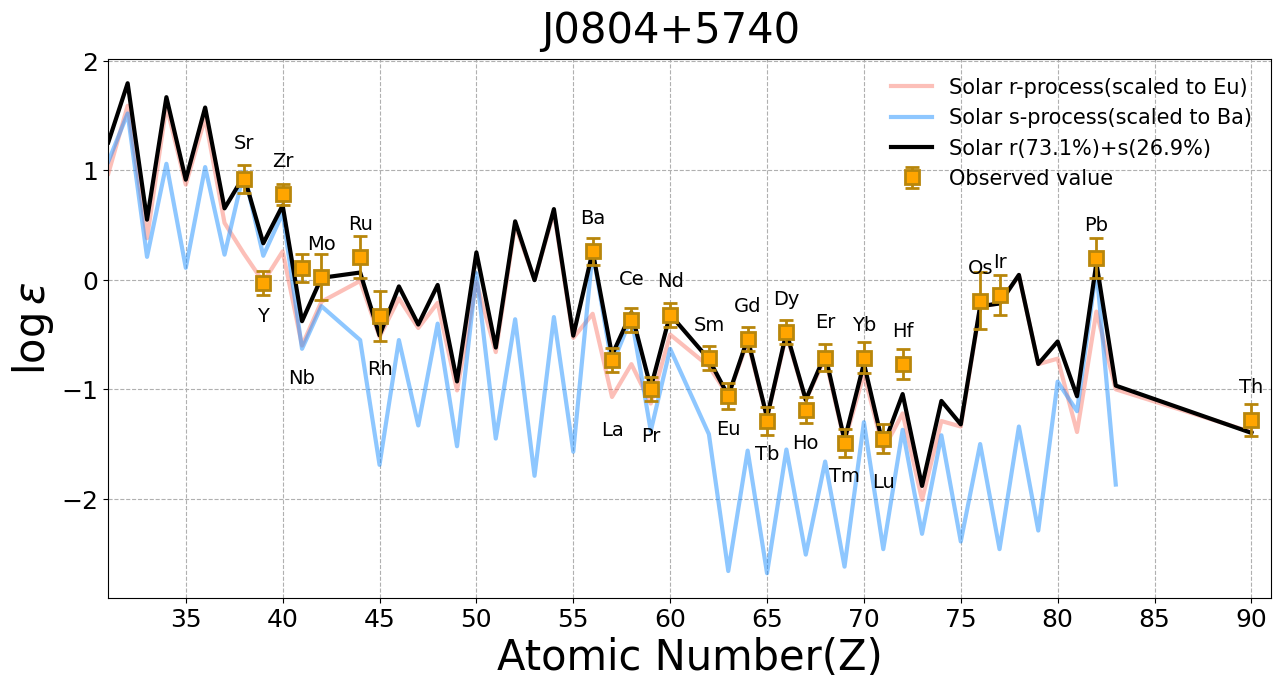

In [94]:
aplt = AbundPlot(datafile='J0804+5740.csv')
star_name = 'J0804+5740'
aplt.load_star(star_name)
fig = aplt.plot()
fig

In [172]:
nfrac_list = []
for path in Path('/home/jiangrz/ssd/GitHub/rproc/data/sne/nst2017').iterdir():
    if path.suffix == '.dat':
        mfrac, nfrac = read_refdata(path)
        nfrac_list.append(nfrac)
        # break
M_mrsn = np.log10(np.array(nfrac_list))
M_mrsn = M_mrsn - M_mrsn[:, [0]] + 12# - M[:, [25]]

nfrac_list = []
P_list = []
for path in Path('/home/jiangrz/ssd/GitHub/rproc/data/sne/hw2010').iterdir():
    if path.suffix == '.dat':
        mfrac, nfrac = read_refdata(path)
        nfrac_list.append(nfrac)
        # break
        P_vec = np.array([path.stem[:4], path.stem[4:7], path.stem[7:]], dtype=np.float64)
        P_vec /= 10
        P_list.append(P_vec)
M_ccsn = np.log10(np.array(nfrac_list))
M_ccsn = M_ccsn - M_ccsn[:, [0]] + 12# - M[:, [25]]
P_ccsn = np.array(P_list)

nfrac_list = []
P_list = []
for path in Path('/home/jiangrz/ssd/GitHub/rproc/data/sne/just2015').iterdir():
    if path.suffix == '.dat':
        mfrac, nfrac = read_refdata(path)
        nfrac_list.append(nfrac)
        # break
        P_vec = np.array([path.stem[:2], path.stem[2:6], path.stem[6:]], dtype=np.float64)
        # break
        P_vec[1] /= 10000
        P_vec[2] /= 10
        P_list.append(P_vec)
M_nsm = np.log10(np.array(nfrac_list))
M_nsm = M_nsm - M_nsm[:, [0]] + 12# - M[:, [25]]
P_nsm = np.array(P_list)

nfrac_list = []
P_list = []
for path in Path('/home/jiangrz/ssd/GitHub/rproc/data/sne/bisterzo2010').iterdir():
    if path.suffix == '.dat':
        mfrac, nfrac = read_refdata(path)
        nfrac_list.append(nfrac)
        # # break
        # P_vec = np.array([path.stem[:2], path.stem[2:6], path.stem[6:]], dtype=np.float64)
        # # break
        # P_vec[1] /= 10000
        # P_vec[2] /= 10
        # P_list.append(P_vec)
M_agb = np.log10(np.array(nfrac_list))
M_agb = M_agb - M_agb[:, [0]] + 12# - M[:, [25]]
# P_nsm = np.array(P_list)

solmfrac, solnfrac = read_refdata('/home/jiangrz/ssd/GitHub/rproc/data/ref/sol_asplund09.dat')
solref = np.log10(solnfrac)
solref = solref - solref[0] + 12

In [109]:
O_vec = np.full(len(symbol_list), np.nan, dtype=np.float64)
eO_vec = np.full(len(symbol_list), np.nan, dtype=np.float64)
for key in aplt.star_logeps_dict:
    O_vec[Symbol2Z_dict[key]-1] = aplt.star_logeps_dict[key]
    eO_vec[Symbol2Z_dict[key]-1] = aplt.star_elogeps_dict[key]
eM_vec = np.zeros(len(symbol_list))
flag_adopt_light = np.arange(len(O_vec)) < 30
flag_adopt_heavy = np.arange(len(O_vec)) >= 30

In [130]:
chisqr_list = []
for M_vec in M_ccsn:
    flag_detect = (~np.isnan(O_vec)) & (np.isfinite(M_vec))
    A = func_A(M_vec, O_vec, eO_vec, flag_adopt_light)
    AmM2_vec = np.power(A + M_vec[flag_adopt_light & flag_detect] - O_vec[flag_adopt_light & flag_detect], 2)
    eAmM2_vec = np.power(eM_vec[flag_adopt_light & flag_detect], 2) + np.power(eO_vec[flag_adopt_light & flag_detect], 2)
    chisqr = np.sum(AmM2_vec/eAmM2_vec)
    chisqr_list.append(chisqr)
chisqr_arr = np.array(chisqr_list)
chisqr_red_ccsn = np.min(chisqr_arr)/(np.sum(flag_adopt_light & flag_detect)-1)
print(chisqr_red_ccsn)
progenitor_ccsn = M_ccsn[np.argmin(chisqr_arr), :]
A_ccsn = func_A(progenitor_ccsn, O_vec, eO_vec, flag_adopt_light)
progenitor_ccsn += A_ccsn
print(P_ccsn[np.argmin(chisqr_arr)])

chisqr_list = []
for M_vec in M_mrsn:
    flag_detect = (~np.isnan(O_vec)) & (np.isfinite(M_vec))
    A = func_A(M_vec, O_vec, eO_vec, flag_adopt_heavy)
    AmM2_vec = np.power(A + M_vec[flag_adopt_heavy & flag_detect] - O_vec[flag_adopt_heavy & flag_detect], 2)
    eAmM2_vec = np.power(eM_vec[flag_adopt_heavy & flag_detect], 2) + np.power(eO_vec[flag_adopt_heavy & flag_detect], 2)
    chisqr = np.sum(AmM2_vec/eAmM2_vec)
    chisqr_list.append(chisqr)
chisqr_arr = np.array(chisqr_list)
chisqr_red_mrsn = np.min(chisqr_arr)/(np.sum(flag_adopt_heavy & flag_detect)-1)
print(chisqr_red_mrsn)
progenitor_mrsn = M_mrsn[np.argmin(chisqr_arr), :]
A_choice = func_A(progenitor_mrsn, O_vec, eO_vec, flag_adopt_heavy)
progenitor_mrsn += A_choice
# print(P_m[np.argmin(chisqr_arr)])

chisqr_list = []
for M_vec in M_nsm:
    flag_detect = (~np.isnan(O_vec)) & (np.isfinite(M_vec))
    A = func_A(M_vec, O_vec, eO_vec, flag_adopt_heavy)
    AmM2_vec = np.power(A + M_vec[flag_adopt_heavy & flag_detect] - O_vec[flag_adopt_heavy & flag_detect], 2)
    eAmM2_vec = np.power(eM_vec[flag_adopt_heavy & flag_detect], 2) + np.power(eO_vec[flag_adopt_heavy & flag_detect], 2)
    chisqr = np.sum(AmM2_vec/eAmM2_vec)
    chisqr_list.append(chisqr)
chisqr_arr = np.array(chisqr_list)
chisqr_red_nsm = np.min(chisqr_arr)/(np.sum(flag_adopt_heavy & flag_detect)-1)
print(chisqr_red_nsm)
progenitor_nsm = M_nsm[np.argmin(chisqr_arr), :]
A_nsm = func_A(progenitor_nsm, O_vec, eO_vec, flag_adopt_heavy)
progenitor_nsm += A_nsm
print(P_nsm[np.argmin(chisqr_arr)])

M_choice_ccsn_mrsn = np.full(len(symbol_list), np.nan, dtype=np.float64)
M_choice_ccsn_mrsn[flag_adopt_light] = progenitor_mrsn[flag_adopt_light]
M_choice_ccsn_mrsn[flag_adopt_heavy] = progenitor_mrsn[flag_adopt_heavy]
M_choice_ccsn_nsm = np.full(len(symbol_list), np.nan, dtype=np.float64)
M_choice_ccsn_nsm[flag_adopt_light] = progenitor_nsm[flag_adopt_light]
M_choice_ccsn_nsm[flag_adopt_heavy] = progenitor_nsm[flag_adopt_heavy]

8.073726145528621
[21.5  3.  -1.6]


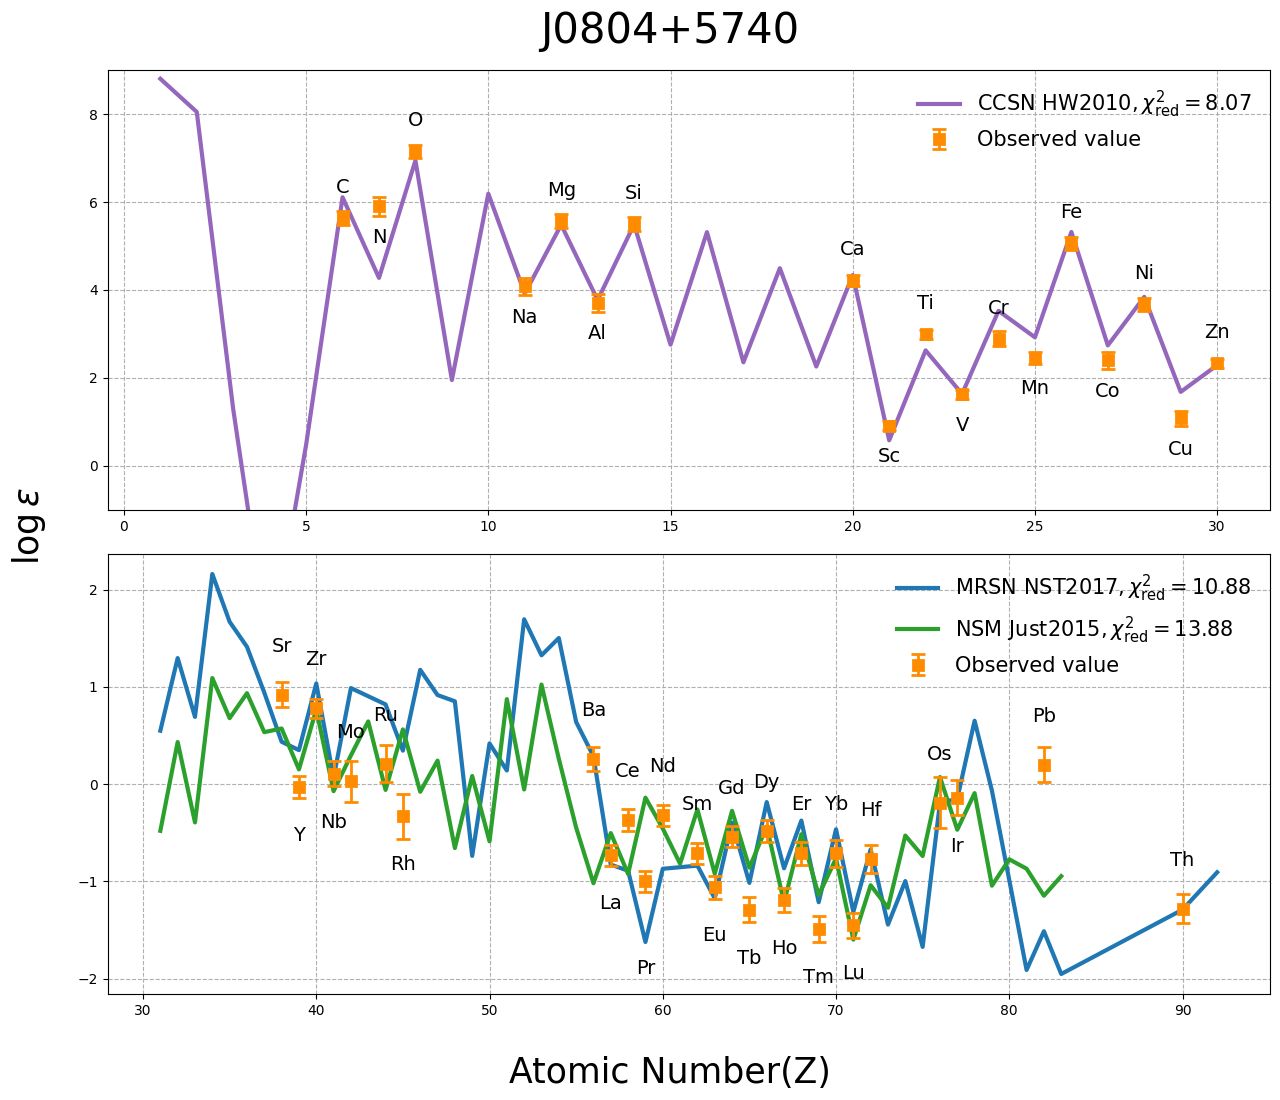

In [171]:
fig, axes = plt.subplots(
    2, 1, figsize=(15, 12), 
    # height_ratios=(2, .9), 
    dpi=100, sharex=False)
fig.subplots_adjust(hspace=.1)
Z_arr = np.array([Symbol2Z_dict[symbol] for symbol in symbol_list])
# ax.plot(
#     Z_arr[np.isfinite(M_choice)], 
#     M_choice[np.isfinite(M_choice)], 
#     linewidth=3, c='black', alpha=.9, 
#     label="MRCC NST2017", 
#     zorder=2)
axes[0].plot(
    Z_arr[np.isfinite(progenitor_ccsn)&flag_adopt_light], 
    progenitor_ccsn[np.isfinite(progenitor_ccsn)&flag_adopt_light], 
    linewidth=3, c='C4', # alpha=.5, 
    label=r"$\mathrm{CCSN\ HW2010}, \chi^2_\mathrm{red}=%.2f$"%chisqr_red_ccsn, 
    zorder=2)
axes[1].plot(
    Z_arr[np.isfinite(progenitor_mrsn)&flag_adopt_heavy], 
    progenitor_mrsn[np.isfinite(progenitor_mrsn)&flag_adopt_heavy], 
    linewidth=3, c='C0', # alpha=.5, 
    label=r"$\mathrm{MRSN\ NST2017}, \chi^2_\mathrm{red}=%.2f$"%chisqr_red_mrsn, 
    zorder=2)
axes[1].plot(
    Z_arr[np.isfinite(progenitor_nsm)&flag_adopt_heavy], 
    progenitor_nsm[np.isfinite(progenitor_nsm)&flag_adopt_heavy], 
    linewidth=3, c='C2', # alpha=.5, 
    label=r"$\mathrm{NSM\ Just2015}, \chi^2_\mathrm{red}=%.2f$"%chisqr_red_nsm,
    zorder=2)
ec = 'darkorange'
ew = 2
flag_adopt_list = [flag_adopt_light, flag_adopt_heavy]
dist_list = [.7, .5]
for ax, flag_adopt, dist in zip(axes, flag_adopt_list, dist_list):
    ax.errorbar(
        Z_arr[flag_adopt], O_vec[flag_adopt], yerr=eO_vec[flag_adopt],
        ecolor=ec, elinewidth=ew, linestyle='', capsize=5, capthick=3,
        marker='s', markersize=7, mfc='darkorange', mec=ec, mew=ew,
        label='Observed value', 
        alpha=1, zorder=10)
    for _idx, (_x, _y) in enumerate(zip(Z_arr[flag_adopt], O_vec[flag_adopt])):
        if np.isnan(_y):
            continue
        _t = Z2Symbol_dict[_x]
        sign_pos = +1
        if _x % 2 == 1:
            sign_pos = -1
        _y += (sign_pos * dist)
        if _t == 'Pr':
            _y -= .4
        ax.text(_x, _y, _t, ha='center', va='center', fontsize=14, zorder=5)
    ax.grid(True, linestyle='--', alpha=1, zorder=1)
    ax.legend(loc='best', fontsize=15, frameon=False)
axes[0].set_ylim(-1 ,9)
fig.supxlabel("Atomic Number(Z)", size=25, y=.03)
fig.supylabel(r'$\log\varepsilon$', size=25, x=.06)
# # axes[1].set_ylabel(r'$\Delta$ log $\varepsilon$', fontdict={'size': 25})
# # axes[1].set_ylabel(r'$|\Delta\log\varepsilon|/\sigma$', fontdict={'size': 30})
fig.suptitle(star_name, y=.93, size=30)
# if fname is not None:
#     fig.savefig(fname, **kw)
# plt.close()
plt.show();